In [209]:
setwd('/import/DB/workdir/cd40/outdata')

In [210]:
outdaa = readRDS('/import/DB//workdir/cd40/outdata/outsider.4.sample.myeloid.rds')

In [211]:
library(Seurat)

In [223]:
table(outdaa$orig.ident)


 d14   d3   d7 sham 
1460 5327 2370 1683 

In [224]:
Idents(outdaa) = 'orig.ident'

In [225]:
outdaa1 = subset(outdaa,idents = c('d3','d7'))

In [226]:
Idents(outdaa1) = 'seurat_clusters'

In [227]:
DefaultAssay(outdaa1) = 'RNA'

In [228]:
# pbmc = outdaa1
# pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
# pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
# pbmc <- ScaleData(pbmc, features = rownames(pbmc))
# pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
# pbmc <- FindNeighbors(pbmc, dims = 1:20)
# pbmc <- FindClusters(pbmc, resolution = 0.3)
# pbmc <- RunUMAP(pbmc, dims = 1:20)

In [229]:
ifnb.list <- SplitObject(outdaa1, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 20, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.5)

Computing 2000 integration features

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7379 anchors

Filtering anchors

	Retained 3988 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7697
Number of edges: 262365

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8664
Number of communities: 14
Elapsed time: 1 seconds


In [230]:
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
sce = testAB.integrated

05:01:56 UMAP embedding parameters a = 0.9922 b = 1.112

05:01:56 Read 7697 rows and found 20 numeric columns

05:01:56 Using Annoy for neighbor search, n_neighbors = 30

05:01:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:01:56 Writing NN index file to temp file /tmp/RtmpZE2Pp9/file15dbc598d41c5

05:01:56 Searching Annoy index using 1 thread, search_k = 3000

05:01:58 Annoy recall = 100%

05:01:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

05:02:00 Initializing from normalized Laplacian + noise (using irlba)

05:02:01 Commencing optimization for 500 epochs, with 325890 positive edges

05:02:21 Optimization finished



In [231]:
options(repr.plot.width = 8,repr.plot.height = 8)

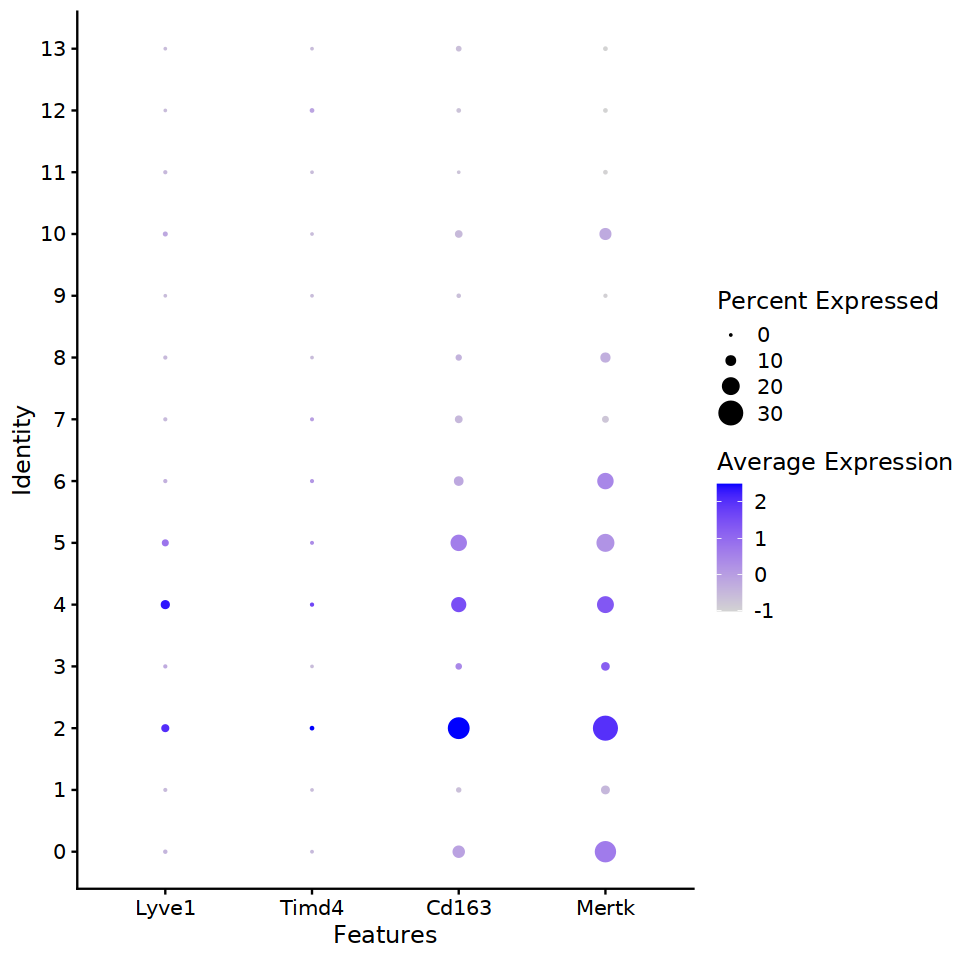

In [232]:
DefaultAssay(sce)='RNA'
Idents(sce) = 'seurat_clusters'
DotPlot(sce,features = c('Lyve1','Timd4','Cd163','Mertk'))

In [234]:
options(repr.plot.width = 5,repr.plot.height = 5)

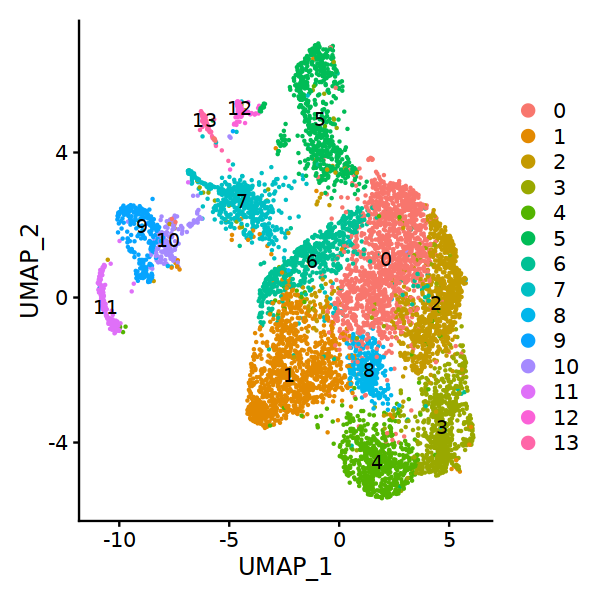

In [235]:
DimPlot(sce,label = T)

In [236]:
Idents(sce) = 'seurat_clusters'
DefaultAssay(sce) = 'RNA'


sce.markers <- FindAllMarkers(object = sce, only.pos = TRUE,   
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



In [237]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
library(ggplot2)

In [238]:
options(repr.plot.height = 15,repr.plot.width = 8)

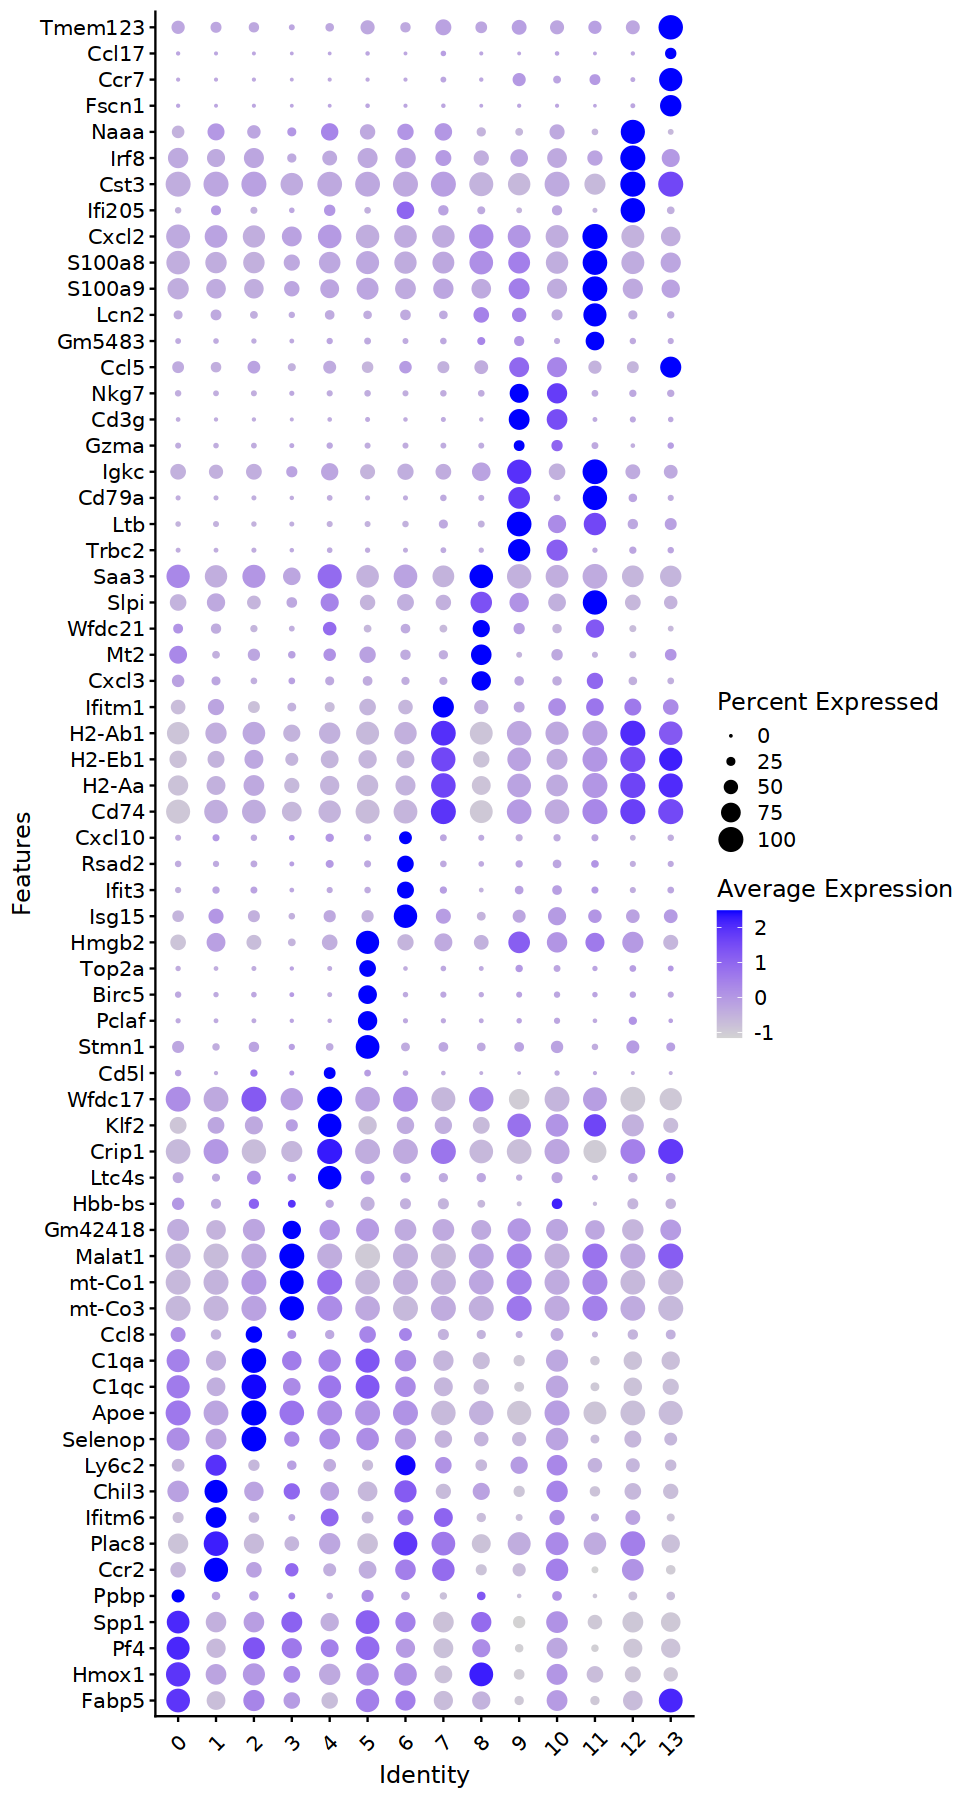

In [239]:
DotPlot(sce, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [246]:
options(repr.plot.height = 4,repr.plot.width = 8)

In [247]:
sce$celltype = paste0('M',sce$seurat_clusters)

In [285]:
Idents(sce) = 'seurat_clusters'

In [286]:
sce1 = subset(sce,idents = c(0,2,3,4,8))

In [287]:
library(CytoTRACE)

In [288]:
table(sce1$celltype)


  M0   M2   M3   M4   M8 
1512  964  720  649  294 

In [289]:
marrow_10x_expr  = as.matrix(sce1@assays$RNA@counts)

In [ ]:
marrow_10x_pheno <- sce1$celltype
marrow_10x_pheno = as.character(marrow_10x_pheno)
names(marrow_10x_pheno) <- rownames(sce1@meta.data)

results = CytoTRACE(marrow_10x_expr, 
	ncores = 8, subsamplesize = 1000)
length(results)  # 8

plotCytoTRACE(
	cyto_obj = results, 
	phenotype = marrow_10x_pheno, #细胞类型注释
	# gene = "Kit",  #是否映射特定基因表达
	emb = NULL,      #是否提供细胞降维坐标
	outputDir = "./" #图片储存路径
)

In [293]:
library(monocle)

In [294]:
bb = sce1

In [295]:
library(dplyr)
library(RColorBrewer)
Idents(bb) = 'celltype'
DefaultAssay(bb) ='RNA'
data <- as(as.matrix(bb@assays$RNA@counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = bb@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)
#Construct monocle cds
monocds <- newCellDataSet(data,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())

print("format data done , filter select genes ")
#pData(monocds)$Cluster<-as.factor(pData(monocds)$celltype) 
pData(monocds)['Cluster']=bb@active.ident	
monocds <- estimateSizeFactors(monocds)
monocds <- estimateDispersions(monocds)

[1] "format data done , filter select genes "


Removing 60 outliers

Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message:
"glm.fit: algorithm did not converge"


In [296]:
cds = monocds

In [297]:
# DefaultAssay(sce1) = 'RNA'
# Idents(sce1) = 'seurat_clusters'
# deg.cluster <- FindAllMarkers(sce1)
# diff.genes <- subset(deg.cluster,p_val_adj<0.05)$gene
# cds <- setOrderingFilter(cds, diff.genes)

In [298]:
# var.genes <- VariableFeatures(sce1)
# cds <- setOrderingFilter(cds, var.genes)

### 备选

In [299]:
disp_table <- dispersionTable(cds)
disp.genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id
cds <- setOrderingFilter(cds, disp.genes)

In [300]:
# diff_test_res <- differentialGeneTest(cds, fullModelFormulaStr = "~celltype")

In [301]:
# cds.raw = cds

In [302]:
# ordering_genes <- row.names (subset(diff_test_res, qval < 0.01))
# cds <- setOrderingFilter(cds, ordering_genes)

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"


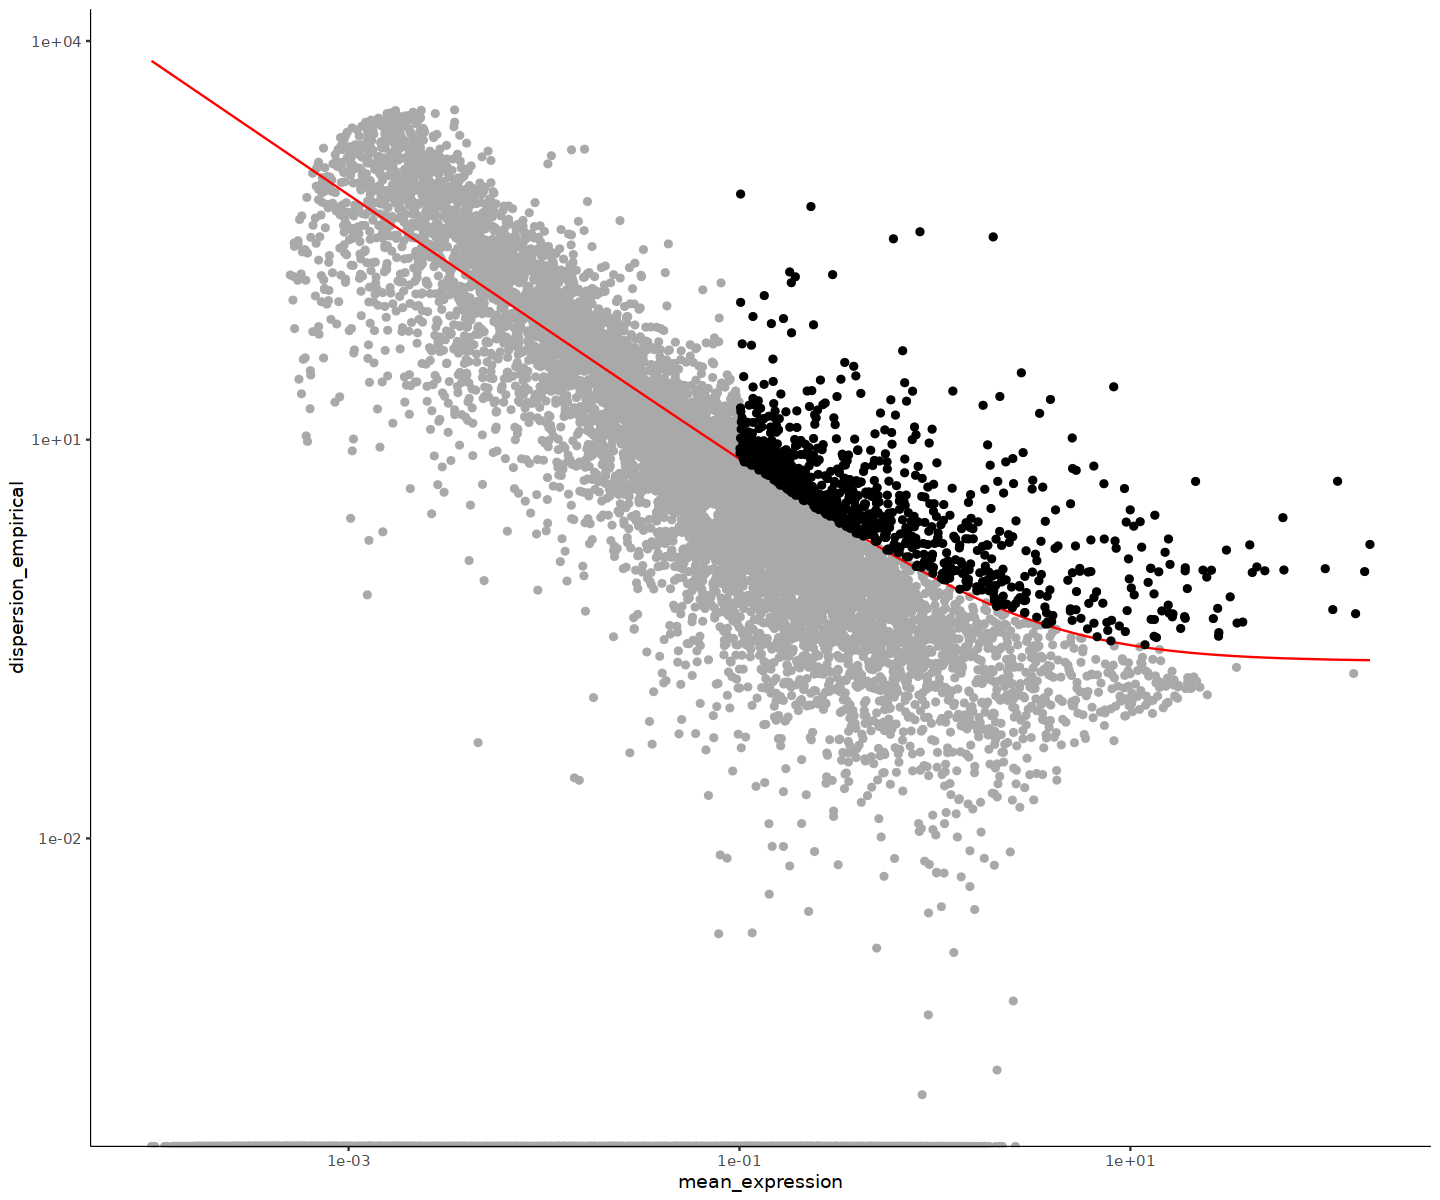

In [303]:

plot_ordering_genes(cds) 
cds <- reduceDimension(cds, max_components = 2,
                       method = 'DDRTree')
cds <- orderCells(cds)

In [304]:
options(repr.plot.width = 12,repr.plot.height = 10)

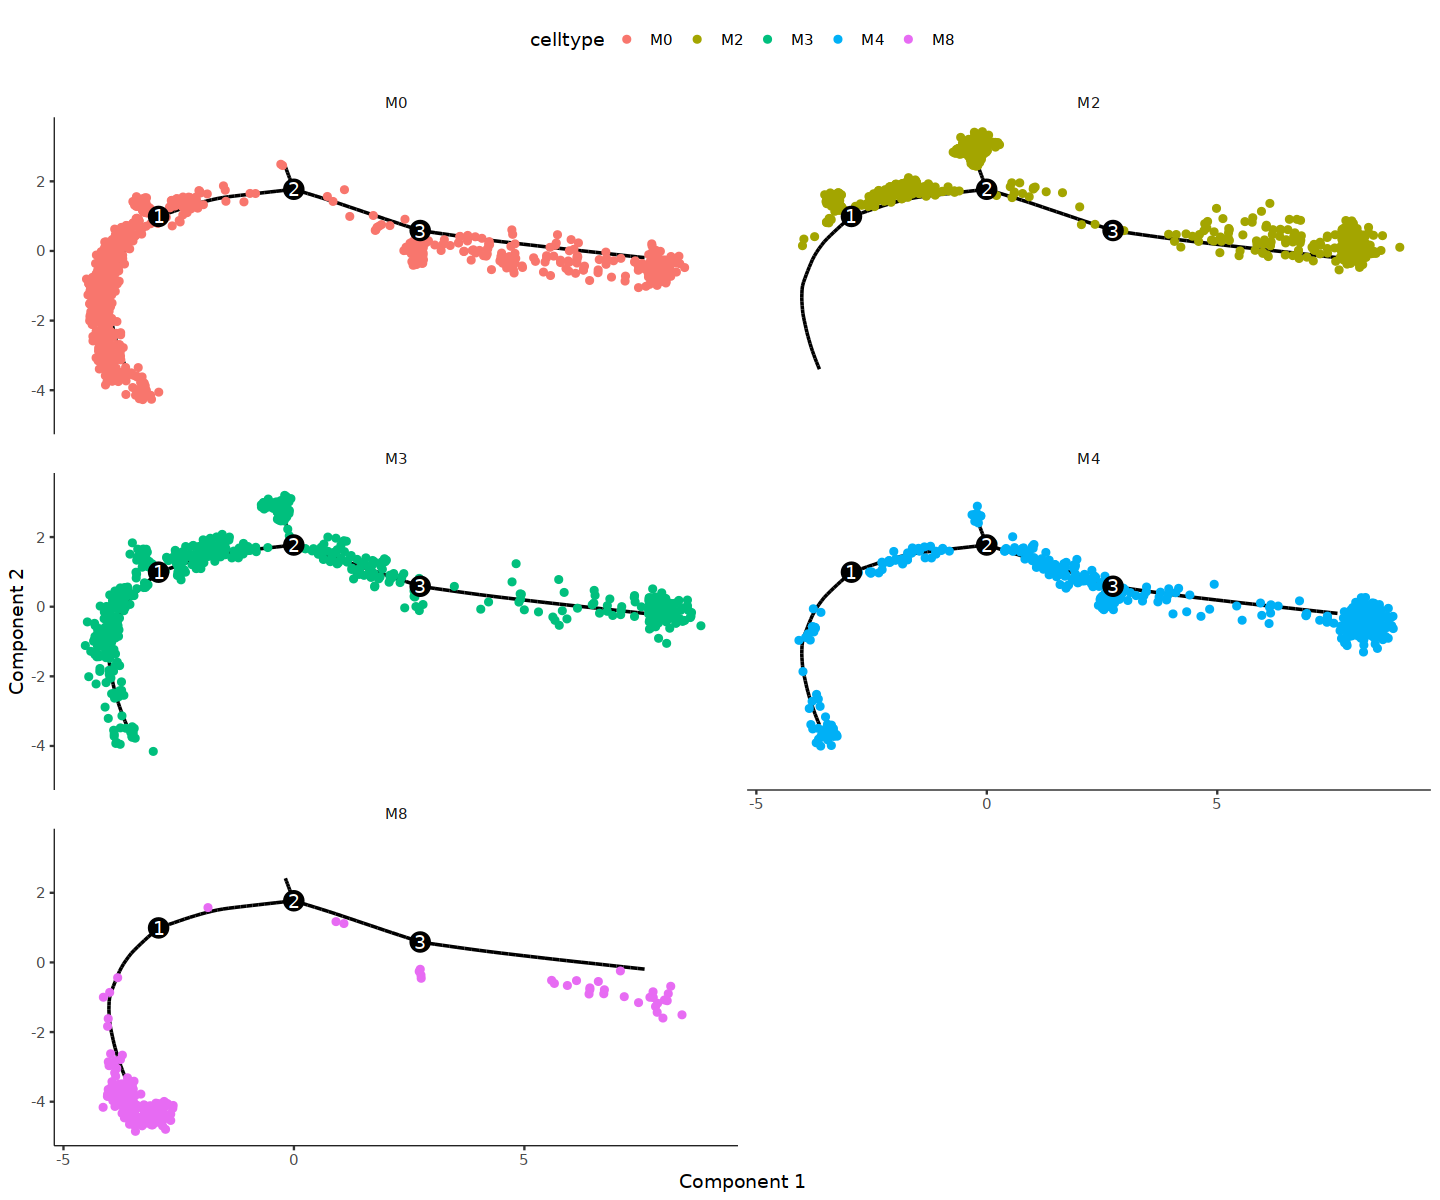

In [305]:
plot_cell_trajectory(cds, color_by = "celltype")+
  facet_wrap(~celltype, nrow = 3)